This file is for making the volume weighted graphs during the two deglaciations

# Set up file

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import sys
sys.path.insert(0, '/srv/ccrc/data06/z5145948/Deglaciation/modules/')
from keyname import keyname as kn
import config
import itertools
import json

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{wasysym}',
    r'\usepackage{textcomp}']

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
fontsize = 18


# Load Stored Results

In [2]:
# Load the oceanic d13C data
results_dict = json.loads(open("Data/results_dict.json","r").read())

# Load the period definitions
df_periods = pd.DataFrame(config.period_list,columns=['range','name'])

# Create Auxillary functions

In [3]:
def normalising(grid_min,grid_max,grid_value):
    '''Function for normalising the latitude, longitude, or depth value as a fraction of the total for the line colours'''
    
    # Get the fraction of the total grid domain
    fraction = (grid_value-grid_min)/(grid_max-grid_min)
    
    return(fraction)

def resolution_count(df,time_min,time_max):
    '''Function for determining the number of points per core within a given time domain'''
    
    # Filter the dataframe based on the time range provided
    df = df[(df.age>time_min)&(df.age<time_max)]
    
    # Create a dictionary for storing the number of points per core
    number_of_points = {}

    # Group the dataframe that contains all the core data by each individual core
    for key,group in df.groupby(['Core']):

        # Find the number of points per core
        number_of_points.update({
            key:len(group)
        })

    # Create a dataframe of the number of points per core in descending order
    df_number_of_points = pd.DataFrame.from_dict(number_of_points,orient='index',columns=['count']).sort_values(by='count',ascending=False)
    
    return(df_number_of_points)


# Extract the high resolution cores

In [7]:
# Define the list of basin that you want to look for high res cores in
basin = ['Atlantic']#,'Pacific','Indian']

# Create a dataframe of all the combinations of the time periods and basins
combinations = pd.DataFrame(list(itertools.product(*[config.period_list,basin]))).rename(
    columns={0:'period',1:'basin'})

# Create an empty dictionary to add the d13C by period and basin
d13C_unsliced_dict = {}

# Loop over all the combinations
for period,basin in zip(
    combinations['period'],
    combinations['basin']
    ):
    
    # Get the relevant hashkey
    hashkey_d13C_unsliced = kn(basin=basin,period=period[1],vartype='df_d13C_unsliced')

    # From the results dict, create dataframe for the relevant results using the hashkey
    df_d13C_unsliced = pd.DataFrame.from_dict(results_dict[hashkey_d13C_unsliced])

    # Make time range arrays
    time_min_range = np.arange(np.min(period[0]),np.max(period[0]),2)
    time_max_range = time_min_range + 5
    
    # Loop over each smaller time frame to find the high res cores that are associated with that subsection of
    # the deglaciation
    for time_min,time_max in zip(time_min_range,time_max_range):
        # Get the high res cores for this subset of the time period
        df_number_of_points = resolution_count(df_d13C_unsliced,time_min,time_max)
        
        # Select the number of cores to be taken as high res for this slice
        number_of_cores = 6
        
        # Get the list of the high res cores for this slice
        high_res_cores = df_number_of_points.head(number_of_cores).index
        
        # Loop over the list of high res cores
        for core in high_res_cores:
            
            # For a single core, get the number of data points for this time slice as a single dataframe
            df = df_d13C_unsliced[
                 (df_d13C_unsliced.Core==core)&(df_d13C_unsliced.age<time_max)&(df_d13C_unsliced.age>time_min)
            ]
            df['period'] = period[1]
            
            d13C_unsliced_dict.update({
                np.random.normal(1000):df
            })
            
            # Compile a dictionary of the all the dataframes of high res cores per slice


/srv/ccrc/data06/z5145948/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Plot the Results

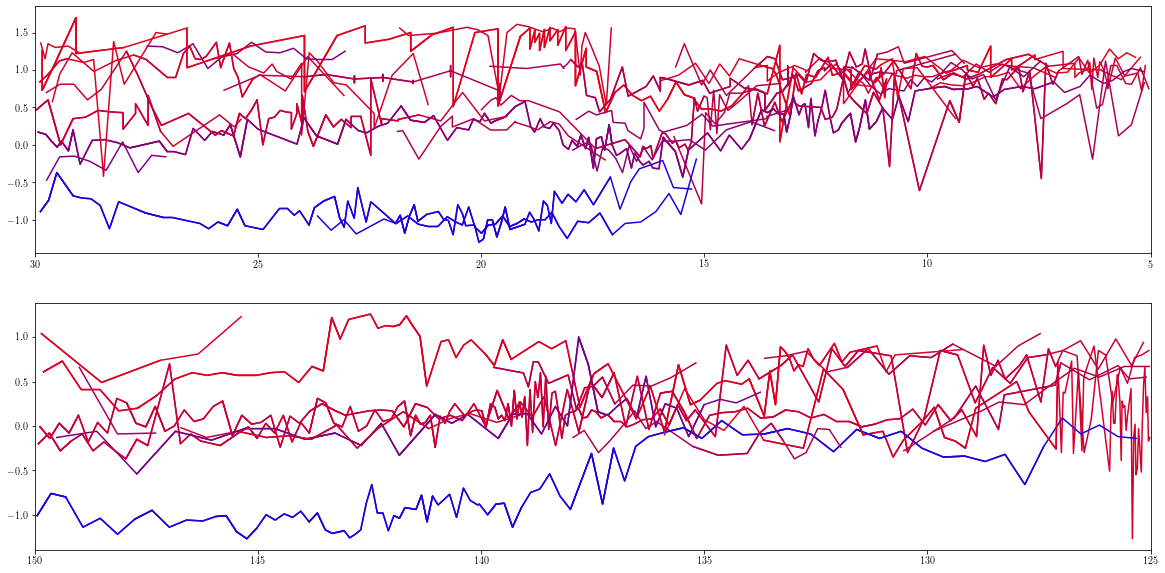

In [8]:

lat_min = -60
lat_max = 80

fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

for key,df_one_high_res_core in d13C_unsliced_dict.items():

    # Get which period this is meant to be
    period = df_one_high_res_core.reset_index().period[0]
    
    # Find an appropriate colour for this core
    core_location = df_one_high_res_core[['Lat']].head(1).values.tolist()[0]
    core_colour = [normalising(grid_min,grid_max,grid_value) for grid_min,grid_max,grid_value in zip(
        [lat_min,lat_max],[lat_max,lat_min],(core_location+core_location))]
    core_colour = [core_colour[0]]+[0]+[core_colour[-1]]
    core_colour.append(1)    
    
    # Plot the line
    if period=='LD':
        ax1.plot(df_one_high_res_core['age'],
                 df_one_high_res_core['d13C'],
                 c=core_colour)    
    elif period=='PD':
        ax2.plot(df_one_high_res_core['age'],
                 df_one_high_res_core['d13C'],
                 c=core_colour)                   

            

            
ax1.set_xlim(30,5)
ax2.set_xlim(150,125)
    

plt.show()
print('')

In [6]:
d13C_unsliced_dict

{999.7303993023659:            Core  Location     Lat      Lon     Dep  d13C     age period
 966   MD03_2664  Atlantic  57.439 -48.6058  3442.0 -0.13  125.02     PD
 967   MD03_2664  Atlantic  57.439 -48.6058  3442.0 -0.17  125.05     PD
 968   MD03_2664  Atlantic  57.439 -48.6058  3442.0  0.33  125.07     PD
 969   MD03_2664  Atlantic  57.439 -48.6058  3442.0  0.15  125.10     PD
 970   MD03_2664  Atlantic  57.439 -48.6058  3442.0  0.66  125.13     PD
 971   MD03_2664  Atlantic  57.439 -48.6058  3442.0  0.46  125.16     PD
 972   MD03_2664  Atlantic  57.439 -48.6058  3442.0 -0.01  125.19     PD
 973   MD03_2664  Atlantic  57.439 -48.6058  3442.0 -0.52  125.21     PD
 974   MD03_2664  Atlantic  57.439 -48.6058  3442.0 -0.03  125.27     PD
 975   MD03_2664  Atlantic  57.439 -48.6058  3442.0 -0.48  125.30     PD
 976   MD03_2664  Atlantic  57.439 -48.6058  3442.0 -0.55  125.33     PD
 977   MD03_2664  Atlantic  57.439 -48.6058  3442.0  0.02  125.35     PD
 978   MD03_2664  Atlantic  57.4